In [375]:
import pandas as pd
import numpy as np

In [376]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', sep=',')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [377]:
data.shape

(10910, 26)

In [378]:
standart_names = lambda x: x.lower()
#data.columns=list(data.columns).apply(standart_names)
data.columns = [standart_names(item) for item in list(data.columns)]
data.head()


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [380]:
data.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [381]:
data.shape

(10910, 26)

In [382]:
data = data.drop('unnamed: 0',axis=1)
data.shape

(10910, 25)

In [383]:
print(data[data['vehicle size'].isna()&data['vehicle class'].isna()].shape[0]) #NaN in vc and vs are going together
print(data[data['response'].isna()&data['state'].isna()].shape[0]) #NaN in state and resp are going together
print(data[data['months since last claim'].isna()&data['number of open complaints'].isna()].shape[0])

print(data[data['state'].isna() |
           data['response'].isna() |
           data['months since last claim'].isna() |
           data['number of open complaints'].isna() |               
           data['vehicle class'].isna() |               
           data['vehicle size'].isna() ].shape[0]) 


622
631
633
1776


So we have 1776 lines with at least one NaN-value (not taking into account column 'vehicle type' which has 5500 NaNs). We can drop such lines, but it's better to leave them to avoid losing information which may be usefull for the analysis. We could try to restore them by extrapolation, but we dont have any reasonable cues for this. For the purposes of this training material we drop them.  We first drop the column 'vehicle size' as it seems the least fullfilled and hence not useful.

In [384]:
data=data.drop('vehicle type', axis=1)
data1=data[(data['response'].isna()==False) & (data['months since last claim'].isna()==False) & (data['vehicle class'].isna()==False)]
data1.shape

#the NaNs are going in pairs (state-respose), (mslc - nooc), (vehicle class - vehicle size), so we are checking only over 3 fields

(9134, 24)

In [385]:
data1.isna().sum() # no more NaN

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [386]:
data1['effective to date'] = pd.to_datetime(data1['effective to date'], errors='coerce')

mfunction = lambda x: x.month 

data1['month']=data1['effective to date'].apply(mfunction)

data1['month'].unique()


/var/folders/40/fpzt8rqs1hd_nf7fht4s6n240000gn/T/ipykernel_2382/3855411059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['effective to date'] = pd.to_datetime(data1['effective to date'], errors='coerce')
/var/folders/40/fpzt8rqs1hd_nf7fht4s6n240000gn/T/ipykernel_2382/3855411059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month']=data1['effective to date'].apply(mfunction)


array([2, 1])

In [387]:
# we got only Jan and Feb in our dataset so no additional filtering for 1st quarter is necessary

In [388]:
data1.shape

(9134, 25)

In [389]:
dataf = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', sep=',')

def superfunction(df):
    standart_names_sf = lambda x: x.lower()
    df.columns = [standart_names_sf(item) for item in list(df.columns)]
    df=df.drop('unnamed: 0',axis=1)
    df=df.drop('vehicle type', axis=1)
    df=df[(df['response'].isna()==False) & (df['months since last claim'].isna()==False) & (df['vehicle class'].isna()==False)]
    
    df['effective to date'] = pd.to_datetime(data1['effective to date'], errors='coerce')
    mfunction_sf = lambda x: x.month 
    df['month']=df['effective to date'].apply(mfunction_sf)

    return df

y = superfunction(dataf)
display(y)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


Lab | Customer Analysis Round 3

In [390]:
# Show DataFrame info
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status  

In [391]:
# Describe DataFrame.
data1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


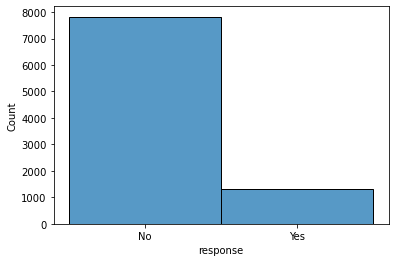

In [392]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.histplot(x="response", data=data1)
plt.show()




,channel,yes,no,total,rate (%)
0,Agent,666,2811,3477,19.15
1,Branch,294,2273,2567,11.45
2,Call Center,192,1573,1765,10.88
3,Web,156,1169,1325,11.77


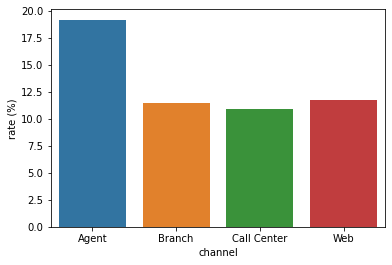

In [417]:
#Show a plot of the response rate by the sales channel.
response=pd.DataFrame(data1[data1['response']=="Yes"]['sales channel'].value_counts())
response.columns=['yes']
response['no']=data1[data1['response']=="No"]['sales channel'].value_counts()
response['total']=response['yes']+response['no']
response['rate']=round(response['yes']/response['total'],4)*100
response=response.reset_index()
response.columns=['channel','yes','no','total','rate (%)']
display(response)

sns.barplot(x='channel', y='rate (%)', data=response)
plt.show()


['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
[ 500 1000 1500 2500 2000 3000]


/var/folders/40/fpzt8rqs1hd_nf7fht4s6n240000gn/T/ipykernel_2382/157211957.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['claim_cohort']=data1['total claim amount'].apply(claim_class)


,claim cohort,total,yes,no,rate (%),claim group
0,500,6189,852.0,5337,13.77,0-500
1,1000,2542,396.0,2146,15.58,500-1000
2,1500,337,60.0,277,17.80,1000-1500
3,2000,47,0.0,47,0.00,1500-2000
4,2500,16,0.0,16,0.00,2000-2500
5,3000,3,0.0,3,0.00,2500-3000


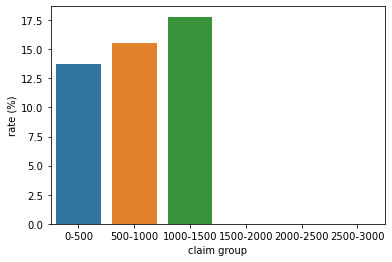

In [410]:
#Show a plot of the response rate by the total claim amount.
###Not sure what this could mean in real world ()

claim_cohorts=[item*500 for item in range(0,6)]
claim_bins=[str(item*500)+'-'+str(item*500+500) for item in range(0,6)]

print(claim_bins)

def claim_class(x):
        if x<500: return 500
        if x<1000: return 1000
        if x<1500: return 1500
        if x<2000: return 2000
        if x<2500: return 2500
        if x<3000: return 3000 #max claim in the dataset is < 3k


data1['claim_cohort']=data1['total claim amount'].apply(claim_class)
print(data1['claim_cohort'].unique())

claim_df=pd.DataFrame(data1['claim_cohort'].value_counts()).sort_index()
claim_df.columns=['total']
claim_df['yes']=data1[data1['response']=="Yes"]['claim_cohort'].value_counts()
claim_df['no']=data1[data1['response']=="No"]['claim_cohort'].value_counts()
claim_df['rate']=round(claim_df['yes']/claim_df['total'],4)*100
claim_df=claim_df.reset_index().fillna(0)
claim_df.columns=['claim cohort','total','yes','no','rate (%)']
claim_df['claim group']=claim_bins
display(claim_df)

sns.barplot(x='claim group', y='rate (%)', data=claim_df)
plt.show()



/var/folders/40/fpzt8rqs1hd_nf7fht4s6n240000gn/T/ipykernel_2382/1625819064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['income_cohort']=data1['income'].apply(income_class)


,income cohort,yes,no,total,rate (%),income group
0,20000,360,2479,2839,12.68,0k-20k
1,40000,408,1866,2274,17.94,20k-40k
2,60000,192,1348,1540,12.47,40k-60k
3,80000,234,1223,1457,16.06,60k-80k
4,100000,114,910,1024,11.13,80k-100k


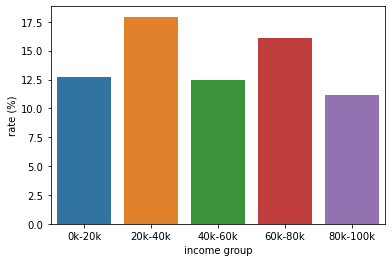

In [416]:
#Show a plot of the response rate by income.
income_cohorts=[item*10000+20000 for item in range(0,10,2)]
income_bins=[str(item*10)+'k-'+str(item*10+20)+'k' for item in range(0,10,2)]

def income_class(x):
        if x<20000: return 20000
        if x<40000: return 40000
        if x<60000: return 60000
        if x<80000: return 80000
        if x<100000: return 100000 #max income in the dataset is < 100k

data1['income_cohort']=data1['income'].apply(income_class)

income_df=pd.DataFrame(data1[data1['response']=="Yes"]['income_cohort'].value_counts()).sort_index()
income_df.columns=['yes']
income_df['no']=data1[data1['response']=="No"]['income_cohort'].value_counts()
income_df['total']=income_df['yes']+income_df['no']
income_df['rate']=round(income_df['yes']/income_df['total'],4)*100
income_df=income_df.reset_index()

income_df.columns=['income cohort','yes','no','total','rate (%)']
income_df['income group']=income_bins
display(income_df)

sns.barplot(x='income group', y='rate (%)', data=income_df)
plt.show()

#data1['positive response']=data1['response']=="Yes"
#data.columns
#sns.histplot(x='income_cohort', y='positive response', data=data1)
#plt.show()